(0.0, 100.0)

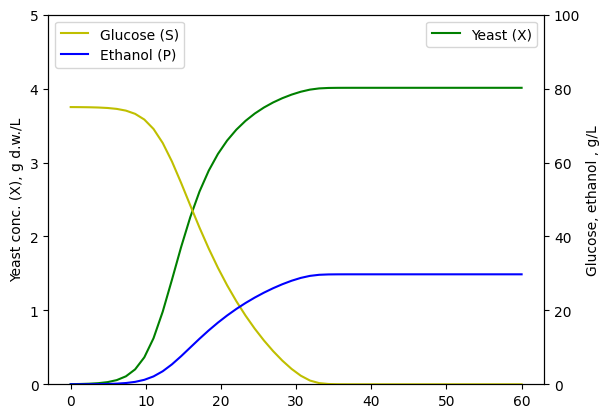

In [1]:
# Fermentacja etanolowa
# Model
# F. Gbdia, C. Casas and C. Sola
# Chem. Tech. Biorechnol. 1988,41, 155-165



import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint


def modelA(y, t):
    X = y[0]
    P = y[1]
    S = y[2]
    dXdt = mi_max * X * np.exp(-KP*P) * S/(KS+S)
    dPdt = ni_max * X * np.exp(-KPP*P) * S/(KSS+S)
    dSdt = -1/RSX * dXdt - 1/RSP*dPdt
    return [dXdt, dPdt, dSdt]

mi_max = 0.556 # 1/h
KS = 1.03 # g/L
KP = 0.139 # g/L
ni_max = 1.79 # 1/h
KSS = 1.68 # g/L
KPP = 0.07 # g/L
RSX = 0.607
RSP = 0.435

# initial conditions
X0 = 0.002 # g d.w./L (d.w. = dry weight)
P0 = 0 #
S0 = 75 # g/L

t = np.linspace(0, 60) # 0 - 60 h
results = odeint( modelA, [X0, P0, S0], t)
X = results[:,0]
P = results[:,1]
S = results[:,2]

ax1 = plt.subplot(111)
ax1.plot(t,X, 'g', label='Yeast (X)')
ax1.set_ylabel('Yeast conc. (X), g d.w./L')
ax1.legend(loc='best')
ax1.set_ylim(0,5)

ax2 = ax1.twinx()
ax2.plot(t,S, 'y', label='Glucose (S)')
ax2.plot(t,P, 'b', label='Ethanol (P)')
ax2.set_ylabel('Glucose, ethanol , g/L')
ax2.set_xlabel('Time, h')
ax2.legend(loc='upper left')
ax2.set_ylim(0,100)